In [1]:
import folium
import json
import random
import ast
import pandas as pd
import branca.colormap as cm
import matplotlib.pyplot as plt

/Users/michelle/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
with open('papdata.json', 'r') as f:
    papdata = json.load(f)

with open('patterns.json', 'r') as f:
    patterns = json.load(f)

infected = {}
with open('simulator_results.txt', 'r') as f:
    for line in f:
        if line[0] == '=':
            cur_timestep = line[16:line.index(' ', 16)]
            infected[cur_timestep] = {'delta': [], 'omicron': []}
        elif line[0] == 'd':
            infected[cur_timestep]['delta'] = ast.literal_eval(line[7:])
        elif line[0] == 'o':
            infected[cur_timestep]['omicron'] = ast.literal_eval(line[9:])

df = pd.DataFrame.from_dict(papdata['places'])    
map = folium.Map(location=(df.loc['latitude'].mean(), df.loc['longitude'].mean()))

random.seed(100)

houselocs = {}
for id in papdata['homes'].keys():
    houselocs[id] = {}
    houselocs[id]['latitude'] = random.uniform(df.loc['latitude'].min(), df.loc['latitude'].max())
    houselocs[id]['longitude'] = random.uniform(df.loc['longitude'].min(), df.loc['longitude'].max())

map

In [3]:
for id, data in papdata['places'].items():
    #folium.Marker((data['latitude'], data['longitude']), popup=f"{id}: {data['label']}", icon=folium.Icon()).add_to(map)
    pass
    
map

In [6]:
redcm = cm.LinearColormap(colors=['red','orange'],index=[0,1],vmin=0,vmax=1)
blucm = cm.LinearColormap(colors=['blue','purple'],index=[0,2],vmin=0,vmax=2)

for timestep, locations in patterns.items():
    if int(timestep) < 99945:
        continue
    
    for id, people in locations['places'].items():
        data = papdata['places'][id]
        coords = (data['latitude'], data['longitude'])
        num_infected = len(list(set(people).intersection(infected[timestep]['delta'] + infected[timestep]['omicron'])))
        #folium.Marker(coords, popup=f"{id}: {data['label']}, {len(people)} people", icon=folium.Icon(color='blue', icon='building', prefix='fa')).add_to(map)
        folium.Circle(coords, radius=(len(people) + 10) * 5, popup=f"{id}: {data['label']}, {len(people)} people, {num_infected} infected", color=blucm(num_infected), fill_color=blucm(num_infected), weight=1).add_to(map)
    
    for id, people in locations['homes'].items():
        coords = (houselocs[id]['latitude'], houselocs[id]['longitude'])
        num_infected = len(list(set(people).intersection(infected[timestep]['delta'] + infected[timestep]['omicron'])))
        folium.Circle(coords, radius=(len(people) + 10)*5, popup=f"{id}: {len(people)} people, {num_infected} infected", color=redcm(num_infected), fill_color=redcm(num_infected), weight=1).add_to(map)
        #folium.Marker(coords, popup=f"{id}: {len(people)} people", icon=folium.Icon(color='red', icon='home', prefix='fa')).add_to(map)

    
    display(map)


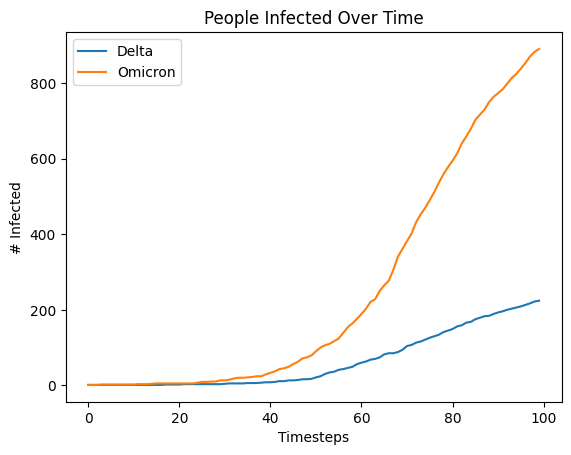

In [7]:
array1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5, 6, 6, 6, 7, 8, 8, 9, 11, 11, 13, 13, 14, 16, 16, 17, 21, 24, 30, 34, 36, 41, 43, 46, 49, 56, 60, 63, 68, 70, 74, 82, 85, 85, 88, 94, 104, 107, 113, 116, 121, 126, 130, 134, 141, 145, 149, 156, 159, 166, 168, 175, 179, 183, 184, 189, 193, 196, 200, 203, 206, 209, 213, 217, 222, 224]
array2 = [1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 9, 9, 10, 10, 13, 13, 15, 18, 20, 20, 21, 22, 24, 24, 29, 33, 37, 43, 45, 49, 56, 62, 71, 74, 79, 90, 100, 106, 110, 117, 124, 139, 154, 164, 176, 189, 203, 221, 228, 250, 265, 277, 306, 341, 361, 382, 402, 432, 453, 470, 491, 512, 537, 559, 578, 595, 614, 640, 659, 679, 703, 717, 730, 750, 764, 774, 784, 799, 814, 825, 839, 854, 871, 883, 891]

plt.plot(array1, label='Delta')
plt.plot(array2, label='Omicron')

plt.xlabel('Timesteps')
plt.ylabel('# Infected')
plt.title('People Infected Over Time')

plt.legend()
plt.show()


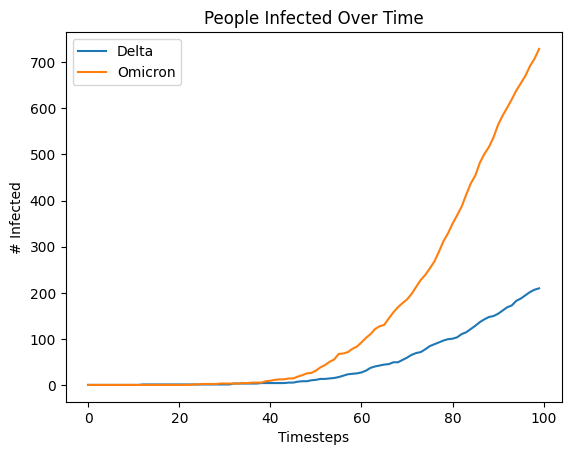

In [9]:
array3 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 8, 9, 9, 11, 12, 14, 14, 15, 16, 18, 21, 24, 25, 26, 28, 32, 38, 41, 43, 45, 46, 50, 50, 55, 60, 66, 70, 72, 78, 85, 89, 93, 97, 100, 101, 104, 111, 115, 122, 129, 137, 143, 148, 150, 155, 162, 169, 173, 183, 188, 195, 202, 207, 210]
array4 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 9, 10, 12, 13, 13, 15, 15, 19, 22, 26, 27, 32, 39, 44, 51, 56, 68, 69, 72, 79, 84, 93, 103, 111, 122, 128, 131, 145, 158, 169, 178, 186, 198, 213, 228, 239, 253, 268, 289, 312, 329, 350, 368, 387, 413, 437, 454, 482, 501, 516, 537, 564, 584, 601, 619, 638, 654, 670, 691, 707, 728]

plt.plot(array3, label='Delta')
plt.plot(array4, label='Omicron')

plt.xlabel('Timesteps')
plt.ylabel('# Infected')
plt.title('People Infected Over Time')

plt.legend()
plt.show()